In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load preprocessed data
train_df = pd.read_csv("preprocessed_train.csv")

# Select features and target variable
X = train_df.drop(columns=["Next_Purchase"])
y = train_df["Next_Purchase"]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=90, random_state=42)
rf_model.fit(X_train, y_train)

# Validate the model
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Save the trained model
joblib.dump(rf_model, "trained_model.pkl")

print("Model training completed!")


Model Accuracy: 88.37%
Model training completed!


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib

# Load preprocessed data
train_df = pd.read_csv("preprocessed_train.csv")

# Select features and target variable
X = train_df.drop(columns=["Next_Purchase"])
y = train_df["Next_Purchase"]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=90, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Validate the model
y_pred = rf_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Calculate F1-score
f1 = f1_score(y_val, y_pred)  # Default: Binary classification

# Classification report
report = classification_report(y_val, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

# Save the trained model
joblib.dump(rf_model, "trained_model.pkl")

print("Model training completed!")


Model Accuracy: 86.14%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       344
           1       0.58      0.23      0.33        60

    accuracy                           0.86       404
   macro avg       0.73      0.60      0.63       404
weighted avg       0.84      0.86      0.84       404

Model training completed!


In [2]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Class Distribution: {y_train.value_counts()}")
print(f"New Class Distribution After SMOTE: {pd.Series(y_train_resampled).value_counts()}")


Original Class Distribution: Next_Purchase
0    1375
1     237
Name: count, dtype: int64
New Class Distribution After SMOTE: Next_Purchase
0    1375
1    1375
Name: count, dtype: int64


In [3]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 5})


In [13]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, scale_pos_weight=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_val)

# Calculate new F1-score
new_f1 = f1_score(y_val, y_pred_xgb)
print(f"New XGBoost F1 Score: {new_f1:.4f}")


New XGBoost F1 Score: 0.5612


In [14]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
}

grid_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, scoring="f1", cv=3, n_iter=5, random_state=42)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20}


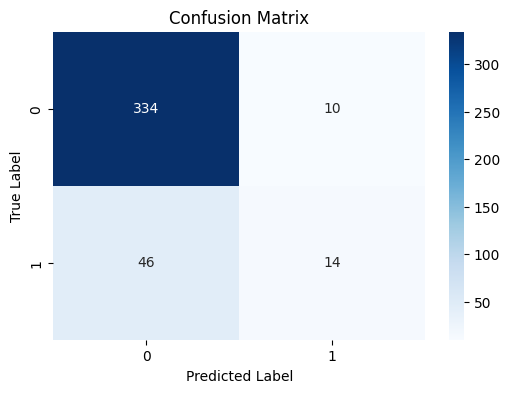

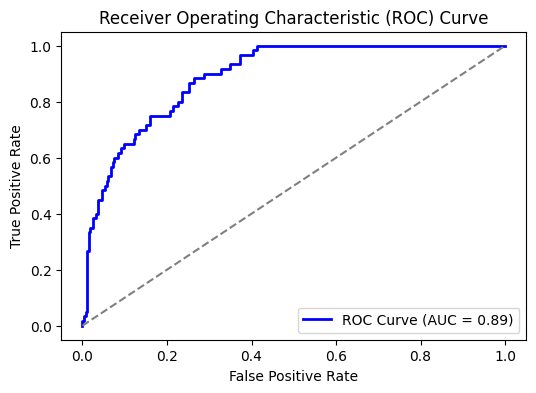

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

